# **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)

**Created by:** Vinícius Albano ([@vinialbano](https://github.com/vinialbano)) - CP3013677

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

**Custom CSS Styles**

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>São Paulo Real Estate 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the sale/rent price of apartments in the city of São Paulo, Brazil.</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg/320px-Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg.png">

---



## Before starting this notebook

This jupyter notebook is designed for **experimental and learning purposes.**
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for some steps of the **machine learning pipeline** - see the ***[Machine Learning Project Checklist by xavecoding](https://github.com/xavecoding/IFSP-CMP-D2APR-2021.2/blob/main/cheat-sheets/machine-learning-project-checklist_by_xavecoding.pdf).***
I tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.

For learning purposes, some parts of the notebook may be _overcommented._ Moreover, to simulate a real development scenarion, we will divide our solution and experiments into "**sprints**" in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...).
The **sprint goal** wil be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that complies and summarizes all sprint – the target problem, solutions, and findings – should be created later.

**Conventions**

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals

- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters

---

## 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context
<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>If you still do not have the context of the problem or if it is uncler to you, you may search for the subject on the internet, for example, on news sites or academic papers.</td>
</tr>
<tr style="background-color: white !important">
    <td></td>
    <td>This will help you not only to understand the problem better, but also in formulating and writing its context here.</td>
</tr>
</table><br/><br/><br/><br/>
    
The  housing  market  is  an  important,  yet  special,  sector  of  the  national  economy.  Its  importance  is  derived  from  two  main  factors:  the  size  of  the  housing  market  and  the  functions  that  residential  properties  perform.  Residential properties additionally perform a number of important socio-economic functions. They meet the most basic needs of having a place to call home and a sense of security, as well as the needs of a higher order, such as the possibility of forming social ties or meeting the needs of self-realization [1].

**California** is the most populous state in the United States (U.S.) with a population about 39.78 million (July, 2020) [2]. It also the largest economy in U.S., boasting a $3.2 trillion gross state product (GSP) as of 2019. [3]. If California were a sovereign nation (2020), it would rank as the world's fifth largest economy [4].

California has the most expensive and largest housing markets in the U.S. [5]. Apart from having one of the highest numbers of migrant workers, California also holds the highest real estate prices. The average price of a home in California is approximately 2.5 times the median national price [5]. It even surpasses the housing prices of Massachusetts and New York, the two states with the most expensive homes and rental rates [5]. <br/><br/>


**References:** <br/>
[1] Zelazowski, K.. "Housing market cycles in the context of business cycles." Real Estate Management and Valuation 25, no. 3 (2017): 5-14. <br/>
[2] State of California, Department of Finances - https://www.dof.ca.gov/Forecasting/Demographics/Estimates/E-2/ (accessed on 2021-08-19). <br/>
[3] Gross Domestic Product by State, Fourth Quarter and Annual 2019" (PDF). US Department of Commerce, BEA (Bureau of Economic Analysis). <br/>
[4] "Report for Selected Countries and Subjects". International Monetary Fund - https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases  <br/>
[5] 21 Eye-Opening California Real Estate Statistics - https://movity.com/blog/california-real-estate-statistics (accessed on 2021-08-19) <br/><br/>

### 🧠 1.2. Challenge
ML São Paulo Apartments is a well-established real estate company working on the housing market in the city of São Paulo, Brazil.

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict the apartment rent and sales prices in the city of São Paulo.** <br/>
These predictions will be used to determine whether it is worth investing in a given area or not.

#### **Baseline:**
Currently, the **apartment prices** are estimated ***manually by experts***: a team gathers up-to-date information about an apartment and finds out the `Price`. 
This is _costly_ and _time-consuming_, and their **estimates are not great**; they often realize that **their estimates were off by more than 20%**.

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>We will consider a dataset with apartment prices of 2019 for learning purposes (see <i>Section 2. Get the Data</i>).</td>
</tr>
</table><br/><br/>

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [São Paulo Real Estate - Sale/Rent - April 2019](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data

The considered dataset contains information on 13,000 apartments for sale and rent in the city of São Paulo, Brazil. It represents properties advertised in April 2019, whose data came from various sources, especially real estate classifieds websites.

As the dataset is not recent, it **should not** be used to predict current prices for rent/sale of apartments in São Paulo; more recent data should be used instead. However, it is excellent for learning and simulating a real case.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data

We previously downloaded the dataset from this [Kaggle repository](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019). However, we could use pandas to read such a remote file directly.

### 2.2. Load the Data

In [3]:
import pandas as pd
df = pd.read_csv('./datasets/sao-paulo-properties-april-2019.csv')

In [4]:
df.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

### 2.3. Take a quick look at the data structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Each row corresponds to an apartment available for sale or rent.

Each apartment is represented by **16 attributes** (9 numeric and 7 categorical).

* Apartment's location: `District`, `Latitude`, `Longitude`.
* `Price`: Advertised price of the apartment (measured in Brazilian Real).
* `Condo`: Comdominium expenses (unknown values are marked as zero).
* `Size`: The property size (measured in Square Meters).
* `Rooms`: Total number of bedrooms.
* `Toilets`: Total number of toilets.
* `Parking`: Number of parking spots.
* `Elevator`: Whether there is an elevator in the building, or not (binary values).
* `Furnished`: Whether the property is furnished, or not (binary values).
* `Swimming Pool`: Whether the property has a swimming pool, or not (binary values).
* `New`: Whether the property was built recently, or not (binary values).
* `Negotiation Type`: If it is available for sale or for rent.
* `Property Type`: The type of the property.

There are **13640 instances** in the dataset, with **no missing features**.

In [6]:
# Fixing data types
df['Elevator'] = df['Elevator'].astype('bool')
df['Furnished'] = df['Furnished'].astype('bool')
df['Swimming Pool'] = df['Swimming Pool'].astype('bool')
df['New'] = df['New'].astype('bool')

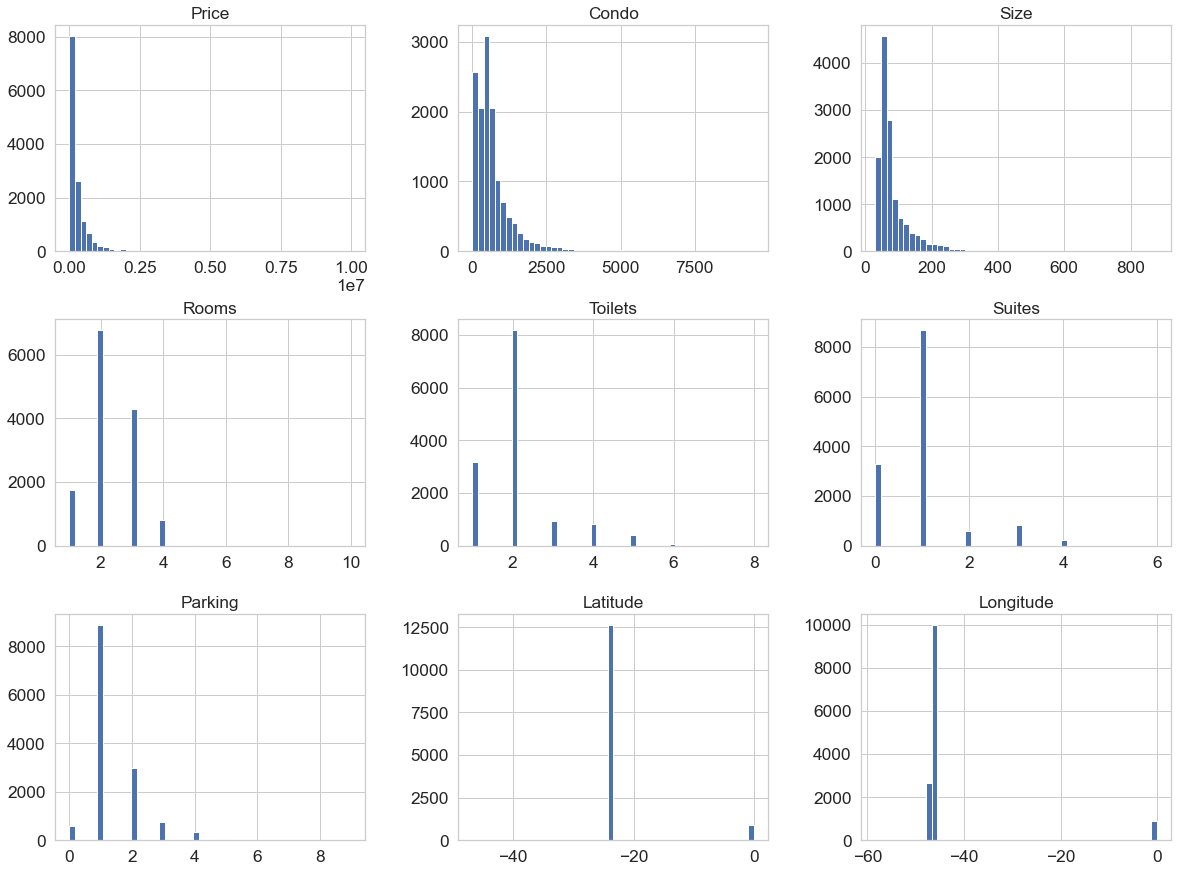

In [7]:
# plot a histogram for each numeric attribute from the database
df.hist(bins=50, figsize=(20,15))
display()

1. The price range is huge, varying from a near-zero value to about R$ 1 million. It may be due to the `Negotiation Type` variable, since **some prices refer to a rent value and others refer to sale**. We need to check this variable in more details.

2. According to the [São Paulo Environmental System](http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid=%7B10787319-DEDC-42F7-BB0A-36CA918C4B82%7D), the geographic coordinates of the city varies inside the following ranges:
* West Longitude: -46.84
* East Longitude: -46.36
* North Latitude: -23.36
* South Latitude: -24.00

We can see that there are some **outliers in the `Latitude` and `Longitude` attributes**, since some instances have values close to or equal to zero. There may be other incorrect values as well.

3. The variables `Elevator`, `Furnished`, `Swimming Pool` and `New` are boolean. We might transform them to categorical if necessary.

4. The numerical attributes have very different scales.

5. Many histograms are _tail-heavy_.

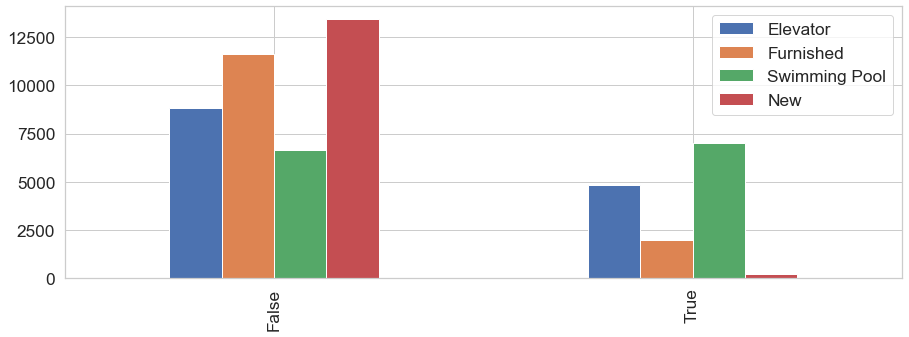

In [8]:
# plot a barplot for each boolean attribute from the database
df[['Elevator', 'Furnished', 'Swimming Pool', 'New']].apply(pd.value_counts).plot.bar()
display()

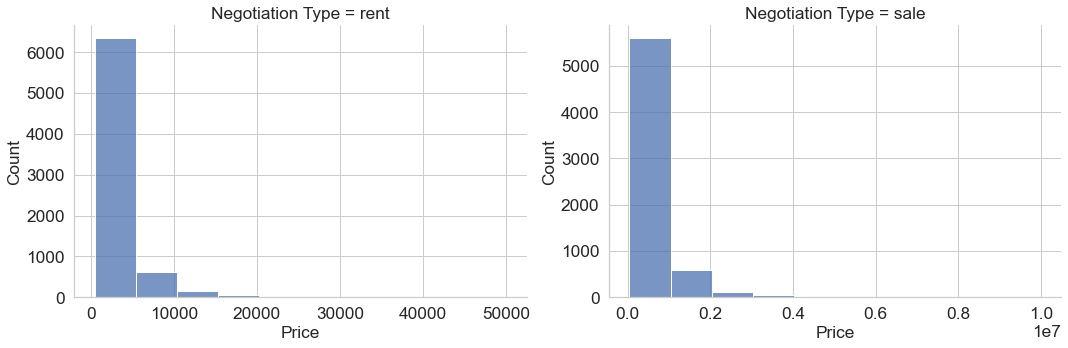

In [9]:
# Checking the price range difference between Negotiation Types
g = sns.FacetGrid(df, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
g.map_dataframe(sns.histplot, x='Price', bins=10)
display()

As expected, there is a big difference of prices between the apartments for rent and for sale. We need to consider this when we are creating our models.

In [10]:
# Describing the non-numerical features
df.describe(include='object')

District Negotiation Type Property Type
count             13640            13640         13640
unique               96                2             1
top     Moema/São Paulo             rent     apartment
freq                293             7228         13640

The `Property Type` attribute contains only one value that is "apartment". We are able to exclude this feature from the dataset.

In [11]:
# Checking for problems with the District attributes
df['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

It seems that all the `Districts` have the text "/São Paulo" in the end. We are able to remove that, since it's just noise.

### 2.4. Checking for duplicated samples

In [12]:
df.duplicated().any()

True

There are duplicated samples (rows) in our dataset. We should remove these samples in order to not add redundancy to our model.

Let's check some information about these rows:

In [13]:
df[df.duplicated()].head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
165   1300    387    50      2        2       1        1     False      False   
203    999      0    70      2        2       1        1     False      False   
204    888      0    70      2        2       1        1     False      False   
207   8000   1400   132      3        2       1        1     False      False   
208   8000   1400   132      3        2       1        1     False      False   

     Swimming Pool    New                      District Negotiation Type  \
165          False  False   Cidade Tiradentes/São Paulo             rent   
203          False  False  Ermelino Matarazzo/São Paulo             rent   
204          False  False  Ermelino Matarazzo/São Paulo             rent   
207          False  False            Iguatemi/São Paulo             rent   
208          False  False            Iguatemi/São Paulo             rent   

    Property Type   Latitude  Longitude  
165     apartment -23.582576 -46.417478  
203     apartment -23.494694 -46.478125  
204     apartment -23.494694 -46.478125  
207     apartment -23.585672 -46.681216  
208     apartment -23.585672 -46.681216

In [14]:
# Checking the total duplicated rows
len(df[df.duplicated()])

319

**There are 319 duplicated samples**. We must remove them in our cleaning phase.

### 2.5. Removing useless information

Before we start a deeper analysis of our dataset and create a model, let's remove some redundancy.

* Remove the `Property Type` attribute, since it is unique for the whole dataset.
* Remove the duplicated rows, since they won't add any value for our study.
* Crop the `District` attribute, removing the unnecessary ending.

In [15]:
# Removing the Property Type column
df.drop(['Property Type'], axis=1, inplace=True)

In [16]:
# Removing the duplicated samples, keeping the first occurrence
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13321 entries, 0 to 13639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13321 non-null  int64  
 1   Condo             13321 non-null  int64  
 2   Size              13321 non-null  int64  
 3   Rooms             13321 non-null  int64  
 4   Toilets           13321 non-null  int64  
 5   Suites            13321 non-null  int64  
 6   Parking           13321 non-null  int64  
 7   Elevator          13321 non-null  bool   
 8   Furnished         13321 non-null  bool   
 9   Swimming Pool     13321 non-null  bool   
 10  New               13321 non-null  bool   
 11  District          13321 non-null  object 
 12  Negotiation Type  13321 non-null  object 
 13  Latitude          13321 non-null  float64
 14  Longitude         13321 non-null  float64
dtypes: bool(4), float64(2), int64(7), object(2)
memory usage: 1.3+ MB


We now have 13321 samples and 15 useful attributes for our analysis.

Another thing we'd like to clean is the `District` values, since all of them have the "/São Paulo" ending, that is unnecessary.

Let's remove that.

In [18]:
df['District'] = df['District'].str.replace(r'/São Paulo', '')
df['District'].unique()

array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
       'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
       'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

### 2.6. Creating a `Test Set`

Let's now split our dataset into a training set and a testing set.

Since the `Price` attribute is tail-heavy, there's a considerable chance that our split doesn't carry enough information of the most expensive apartments. To handle that, let's create a stratified sample, considering the two `Negotiation Type` options.

We will try to simulate a Standard Normal Distribution curve, like the following:
![Normal Curve](https://mathbitsnotebook.com/Algebra2/Statistics/normalstandard.jpg)

#### 2.6.1. Segmenting samples by Price Group

In [19]:
# Creating the price groups for spliting the datasets
df['Price Group'] = df.groupby('Negotiation Type')['Price'].apply(pd.qcut, q=[0, 0.001, 0.006, 0.023, 0.067, 0.159, 0.39, 0.50, 0.691, 0.841, 0.933, 0.977, 0.994, 0.999, 1], labels=np.arange(14))

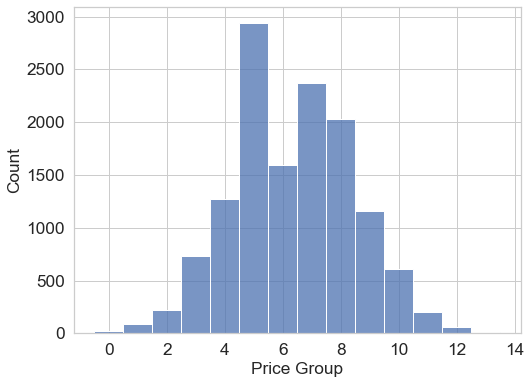

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price Group'])
plt.grid(True)

In [21]:
df.groupby(['Price Group', 'Negotiation Type']).size().unstack()

Negotiation Type  rent  sale
Price Group                 
0                   14     7
1                   53    36
2                   95   123
3                  448   281
4                  719   556
5                 1442  1501
6                  952   647
7                 1162  1206
8                 1065   965
9                  598   558
10                 332   279
11                 100   106
12                  31    30
13                   8     7

In [22]:
df.groupby(['Price Group', 'Negotiation Type']).head(1)

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0         930    220    47      2        2       1        1     False   
4        1300    410    55      2        2       1        1      True   
5        1170      0    50      2        2       1        1     False   
10        760    160    38      2        2       1        1     False   
14       1800    418    54      2        2       1        1      True   
21       2500    720    68      3        2       1        1     False   
32       3000    811   107      3        3       1        2      True   
33       6000    800   150      3        4       3        2      True   
121       700      0    30      1        2       1        1     False   
122       500      0    50      1        2       1        1     False   
168     18000   1890   245      4        5       2        4      True   
206      8000   1400   132      3        2       1        1     False   
234     45000      0   443      4        2       1        1     False   
1076    29000   6300   288      3        4       2        6      True   
4901   732600   1000    74      1        2       1        2      True   
4902  1990000   2400   164      4        5       2        3      True   
4905  1200000    900    56      2        2       1        2     False   
4918  2680001      0   168      2        3       2        3      True   
4928   530000    335    70      2        2       1        1     False   
4932   369000    295    63      2        2       1        1      True   
4944   203000    190    34      2        2       1        1      True   
5006  8000000      0   278      4        5       3        5      True   
5054   270000    250    35      1        2       1        1     False   
5519   179000      0    44      2        2       1        1      True   
5576   125000    320    32      1        2       1        1      True   
6199    70000      0    48      2        2       1        1     False   
6201    65000    110    48      2        2       1        1     False   
6279  7080000      0   275      4        5       4        5     False   

      Furnished  Swimming Pool    New           District Negotiation Type  \
0         False          False  False        Artur Alvim             rent   
4         False          False  False        Artur Alvim             rent   
5         False          False  False        Artur Alvim             rent   
10        False          False  False        Artur Alvim             rent   
14        False           True  False              Belém             rent   
21        False           True  False              Belém             rent   
32        False           True  False              Belém             rent   
33         True          False  False              Belém             rent   
121       False          False  False       Cidade Líder             rent   
122       False          False  False       Cidade Líder             rent   
168       False           True  False  Cidade Tiradentes             rent   
206       False          False  False           Iguatemi             rent   
234       False          False  False           Iguatemi             rent   
1076      False           True  False         Itaim Bibi             rent   
4901      False           True  False      Vila Madalena             sale   
4902       True           True  False      Vila Madalena             sale   
4905       True           True  False      Vila Madalena             sale   
4918      False           True  False      Vila Madalena             sale   
4928      False          False  False      Vila Madalena             sale   
4932      False           True  False              Mooca             sale   
4944      False           True  False              Mooca             sale   
5006      False           True  False       Vila Olimpia             sale   
5054      False           True  False              Mooca             sale   
5519      False          False  False     

In [23]:
# proportional of the groups in the entire dataset
df['Price Group'].value_counts() / len(df['Price Group'])

5     0.220929
7     0.177764
8     0.152391
6     0.120036
4     0.095714
9     0.086780
3     0.054726
10    0.045867
2     0.016365
11    0.015464
1     0.006681
12    0.004579
0     0.001576
13    0.001126
Name: Price Group, dtype: float64

#### 2.6.2. Stratified Sampling

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Price Group'], random_state=27)

In [25]:
df_train.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4229     6000   2200   165      3        2       1        2      True   
649      1500    915    86      3        2       1        1      True   
6260   400000    560    50      2        2       1        1      True   
4966   785000    550    67      2        2       1        1     False   
10344    1700    890    47      1        1       0        1     False   

       Furnished  Swimming Pool    New           District Negotiation Type  \
4229       False           True  False  Alto de Pinheiros             rent   
649         True           True  False       Vila Matilde             rent   
6260       False           True  False         Guaianazes             sale   
4966       False           True  False           Brooklin             sale   
10344      False          False  False      Santa Cecília             rent   

        Latitude  Longitude Price Group  
4229  -23.541829 -46.718899           9  
649   -23.525410 -46.525949           5  
6260  -23.493276 -46.617289           7  
4966  -23.618385 -46.684776           8  
10344   0.000000   0.000000           6

In [26]:
df_train.shape

(10656, 16)

In [27]:
# proportional of the groups in the training set
df_train['Price Group'].value_counts() / len(df_train['Price Group'])

5     0.220908
7     0.177740
8     0.152402
6     0.120026
4     0.095721
9     0.086806
3     0.054711
10    0.045890
2     0.016329
11    0.015484
1     0.006663
12    0.004598
0     0.001595
13    0.001126
Name: Price Group, dtype: float64

In [28]:
df_test.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
12888  150000    100    48      2        1       0        1     False   
5855   585000    690    70      2        2       1        1      True   
11370  299628    350    69      3        2       1        2      True   
6723   235000    350    50      2        2       1        1     False   
1887     2500    602    71      2        2       1        1      True   

       Furnished  Swimming Pool    New        District Negotiation Type  \
12888      False          False  False  José Bonifácio             sale   
5855        True           True  False        Tucuruvi             sale   
11370      False           True  False        Medeiros             sale   
6723       False          False  False     Vila Curuçá             sale   
1887       False          False  False            Lapa             rent   

        Latitude  Longitude Price Group  
12888 -23.555681 -46.431571           2  
5855  -23.468685 -46.606646           7  
11370 -23.179604 -46.996822           5  
6723  -23.507291 -46.424997           5  
1887  -23.533622 -46.704409           7

In [29]:
df_test.shape

(2665, 16)

In [30]:
# proportional of the groups in the test set
df_test['Price Group'].value_counts() / len(df_test['Price Group'])

5     0.221013
7     0.177861
8     0.152345
6     0.120075
4     0.095685
9     0.086679
3     0.054784
10    0.045779
2     0.016510
11    0.015385
1     0.006754
12    0.004503
0     0.001501
13    0.001126
Name: Price Group, dtype: float64

### 2.6.3. Saving the Datasets

In [31]:
# removing the attribute "Price Group"
df_train = df_train.drop(columns=['Price Group'])
df_test = df_test.drop(columns=['Price Group'])

In [32]:
df_train.to_csv('./datasets/sao-paulo-properties_train_sprint-1.csv', index=False)
df_test.to_csv('./datasets/sao-paulo-properties_test_sprint-1.csv', index=False)

## 🧹 3. Data Cleaning

In [33]:
df_train_clean = df_train.copy()

In [34]:
df_train_clean.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4229     6000   2200   165      3        2       1        2      True   
649      1500    915    86      3        2       1        1      True   
6260   400000    560    50      2        2       1        1      True   
4966   785000    550    67      2        2       1        1     False   
10344    1700    890    47      1        1       0        1     False   

       Furnished  Swimming Pool    New           District Negotiation Type  \
4229       False           True  False  Alto de Pinheiros             rent   
649         True           True  False       Vila Matilde             rent   
6260       False           True  False         Guaianazes             sale   
4966       False           True  False           Brooklin             sale   
10344      False          False  False      Santa Cecília             rent   

        Latitude  Longitude  
4229  -23.541829 -46.718899  
649   -23.525410 -46.525949  
6260  -23.493276 -46.617289  
4966  -23.618385 -46.684776  
10344   0.000000   0.000000

### 3.1. Missing values

As we checked in the dataset description, the `Condo` value is filled with zero when it is unknown.

Also, there are wrong `Latitude` and `Longitude` values.

A good estimative for these attributes would be the ***median*** values of other samples in the same `District`.

In [35]:
# Checking the median Condo by District
df_train_clean.groupby('District')[['Condo', 'Latitude', 'Longitude']].median().head()

Condo   Latitude  Longitude
District                                       
Alto de Pinheiros  1200.0 -23.542629 -46.715501
Anhanguera          650.0 -23.660743 -46.686148
Aricanduva          330.0 -23.538514 -46.518194
Artur Alvim         140.0 -23.538515 -46.480723
Barra Funda         520.0 -23.524613 -46.658090

In [36]:
mask_na_condo = df_train_clean['Condo'].eq(0)
df_train_clean[mask_na_condo].head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
1859      1500      0    65      2        2       1        1      True   
6435    198500      0    50      2        2       1        1      True   
5008   8039200      0   278      4        7       4        4      True   
12776   260000      0    48      2        1       0        1      True   
12716   135000      0    45      2        1       0        1     False   

       Furnished  Swimming Pool    New            District Negotiation Type  \
1859       False          False  False                Lapa             rent   
6435       False           True  False             Lajeado             sale   
5008        True           True  False        Vila Olimpia             sale   
12776      False           True  False  Ermelino Matarazzo             sale   
12716      False          False  False   Cidade Tiradentes             sale   

        Latitude  Longitude  
1859  -23.522944 -46.699231  
6435  -23.534887 -46.403105  
5008  -23.596469 -46.680587  
12776 -23.512543 -46.477098  
12716 -23.566472 -46.401413

In [37]:
mask_wrong_latitude = df_train_clean.eval('Latitude == 0 | Latitude > -23.36 | Latitude < -24.00')
df_train_clean[mask_wrong_latitude].head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
10344     1700    890    47      1        1       0        1     False   
8766    830000   1251    48      1        2       1        1      True   
3608      2500    536    40      1        1       0        1     False   
12924   234900    200    47      2        2       1        1     False   
8178   1100000   1200   126      3        2       1        1     False   

       Furnished  Swimming Pool    New         District Negotiation Type  \
10344      False          False  False    Santa Cecília             rent   
8766       False           True  False       Itaim Bibi             sale   
3608        True          False  False       Itaim Bibi             rent   
12924      False          False  False  Parque do Carmo             sale   
8178       False          False  False       Bela Vista             sale   

       Latitude  Longitude  
10344       0.0        0.0  
8766        0.0        0.0  
3608        0.0        0.0  
12924       0.0        0.0  
8178        0.0        0.0

In [38]:
mask_wrong_longitude = df_train_clean.eval('Longitude == 0 | Longitude > -46.36 | Longitude < -46.84')
df_train_clean[mask_wrong_longitude].head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
10344     1700    890    47      1        1       0        1     False   
8766    830000   1251    48      1        2       1        1      True   
3608      2500    536    40      1        1       0        1     False   
12924   234900    200    47      2        2       1        1     False   
8178   1100000   1200   126      3        2       1        1     False   

       Furnished  Swimming Pool    New         District Negotiation Type  \
10344      False          False  False    Santa Cecília             rent   
8766       False           True  False       Itaim Bibi             sale   
3608        True          False  False       Itaim Bibi             rent   
12924      False          False  False  Parque do Carmo             sale   
8178       False          False  False       Bela Vista             sale   

       Latitude  Longitude  
10344       0.0        0.0  
8766        0.0        0.0  
3608        0.0        0.0  
12924       0.0        0.0  
8178        0.0        0.0

In [39]:
# Inputing the median Condo to the missing rows
fill_vals = df_train_clean['Condo'].mask(mask_na_condo).groupby(df_train_clean['District']).transform(np.nanmedian)
df_train_clean = df_train_clean.assign(Condo = df_train_clean['Condo'].mask(mask_na_condo, fill_vals))

In [40]:
# Inputing the median Latitude to the wrong rows
fill_vals = df_train_clean['Latitude'].mask(mask_wrong_latitude).groupby(df_train_clean['District']).transform(np.nanmedian)
df_train_clean = df_train_clean.assign(Latitude = df_train_clean['Latitude'].mask(mask_wrong_latitude, fill_vals))

In [41]:
# Inputing the median Longitude to the wrong rows
fill_vals = df_train_clean['Longitude'].mask(mask_wrong_longitude).groupby(df_train_clean['District']).transform(np.nanmedian)
df_train_clean = df_train_clean.assign(Longitude = df_train_clean['Longitude'].mask(mask_wrong_longitude, fill_vals))

In [42]:
# Checking the new Condo values
df_train_clean[mask_na_condo].head()

Price   Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
1859      1500   769.0    65      2        2       1        1      True   
6435    198500   227.5    50      2        2       1        1      True   
5008   8039200  1034.0   278      4        7       4        4      True   
12776   260000   352.0    48      2        1       0        1      True   
12716   135000   140.0    45      2        1       0        1     False   

       Furnished  Swimming Pool    New            District Negotiation Type  \
1859       False          False  False                Lapa             rent   
6435       False           True  False             Lajeado             sale   
5008        True           True  False        Vila Olimpia             sale   
12776      False           True  False  Ermelino Matarazzo             sale   
12716      False          False  False   Cidade Tiradentes             sale   

        Latitude  Longitude  
1859  -23.522944 -46.699231  
6435  -23.534887 -46.403105  
5008  -23.596469 -46.680587  
12776 -23.512543 -46.477098  
12716 -23.566472 -46.401413

In [43]:
# Checking the new Latitude values
df_train_clean[mask_wrong_latitude].head()

Price   Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
10344     1700   890.0    47      1        1       0        1     False   
8766    830000  1251.0    48      1        2       1        1      True   
3608      2500   536.0    40      1        1       0        1     False   
12924   234900   200.0    47      2        2       1        1     False   
8178   1100000  1200.0   126      3        2       1        1     False   

       Furnished  Swimming Pool    New         District Negotiation Type  \
10344      False          False  False    Santa Cecília             rent   
8766       False           True  False       Itaim Bibi             sale   
3608        True          False  False       Itaim Bibi             rent   
12924      False          False  False  Parque do Carmo             sale   
8178       False          False  False       Bela Vista             sale   

        Latitude  Longitude  
10344 -23.537651 -46.656300  
8766  -23.583839 -46.676243  
3608  -23.583839 -46.676243  
12924 -23.568891 -46.469521  
8178  -23.557978 -46.647880

### 3.2. Saving the Dataset

In [44]:
df_train_clean.to_csv('./datasets/sao-paulo-properties_train_clean_sprint-1.csv', index=False)

## 📊 4. Explore the Data
We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

Since the `Price` attribute is very different depending on the `Negotiation Type`, let's visualize them separately.

In [44]:
mask_sale = df_train_clean['Negotiation Type'].eq('sale')
mask_rent = df_train_clean['Negotiation Type'].eq('rent')

### 4.1. Visualizing Geographical Data

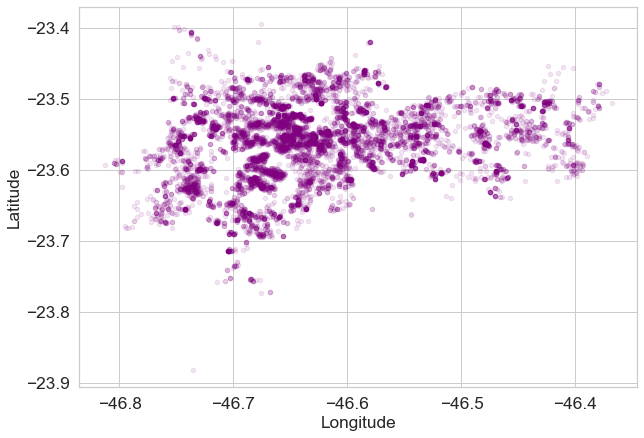

In [45]:
df_train_clean.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7), color="Purple")
display()

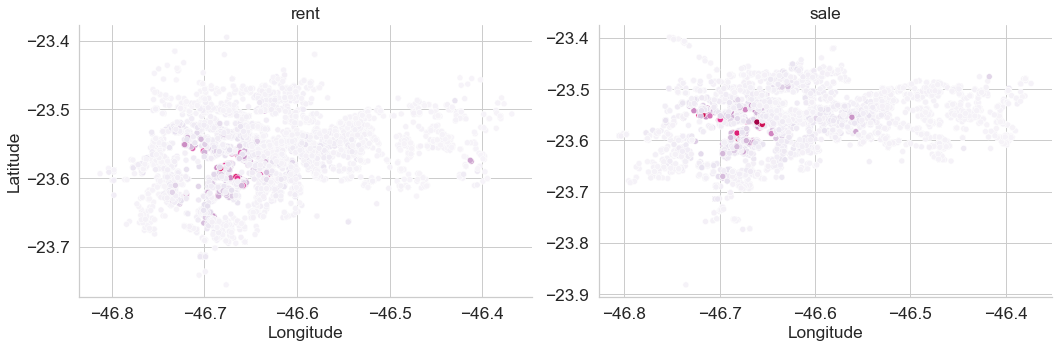

In [46]:
grid = sns.FacetGrid(df_train_clean, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
plot = grid.map_dataframe(sns.scatterplot, x="Longitude", y="Latitude", hue="Price", palette="PuRd")
plot.set_titles("{col_name}")
display()

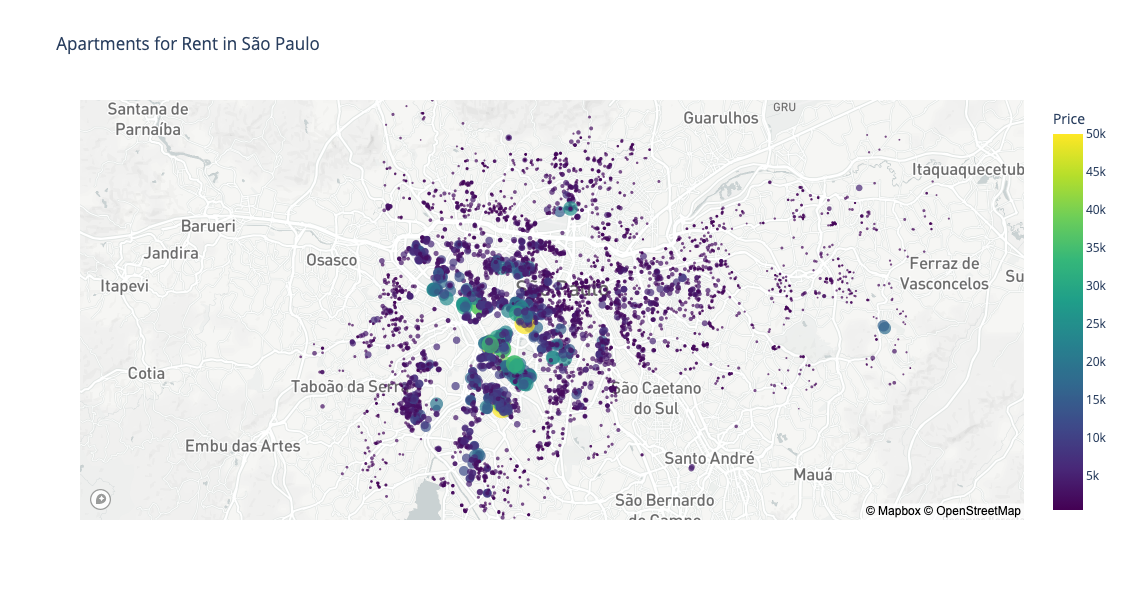

In [66]:
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(df_train_clean[mask_rent], lat="Latitude", lon="Longitude", color="Price", size="Price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10, width=1000, height=600,
                        title='Apartments for Rent in São Paulo')
fig.show()

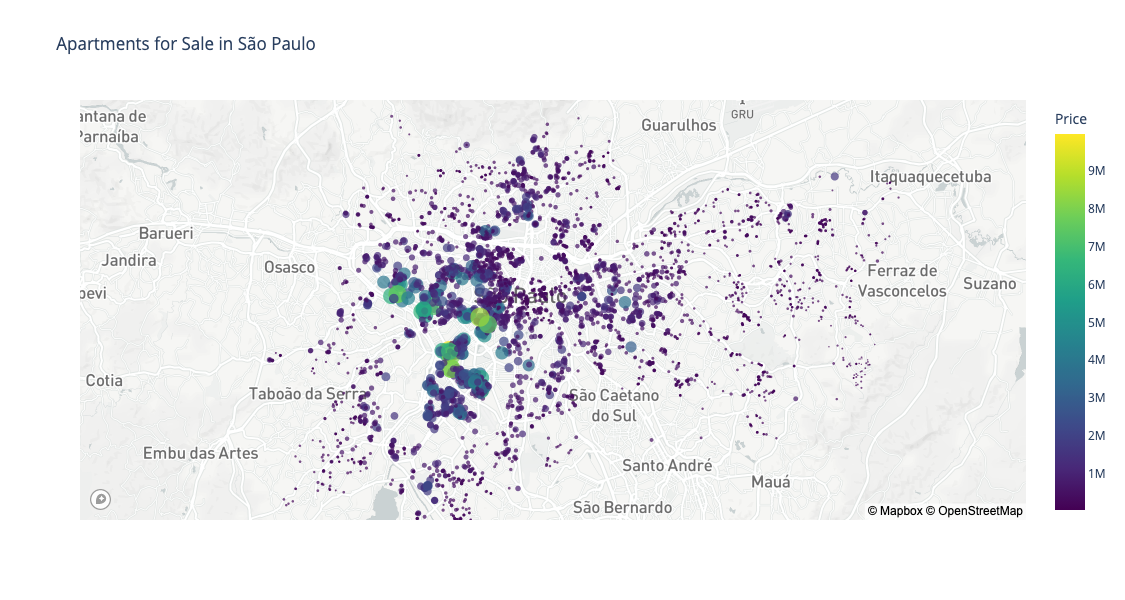

In [65]:
fig = px.scatter_mapbox(df_train_clean[mask_sale], lat="Latitude", lon="Longitude", color="Price", size="Price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10, width=1000, height=600,
                       title='Apartments for Sale in São Paulo')
fig.show()

Some interesting findings:

- The most expensive apartments are in the West and South Central regions of the city (as expected).
- There are almost no observations in the extreme south of São Paulo.

### 4.2. Looking for Correlations
The **correlation coefficient** measures the _linear correlation_ between two variables. It ranges from –1 (perfect negative correlation)  to 1 (perfect positive correlation).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png' width=800>

Source: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png

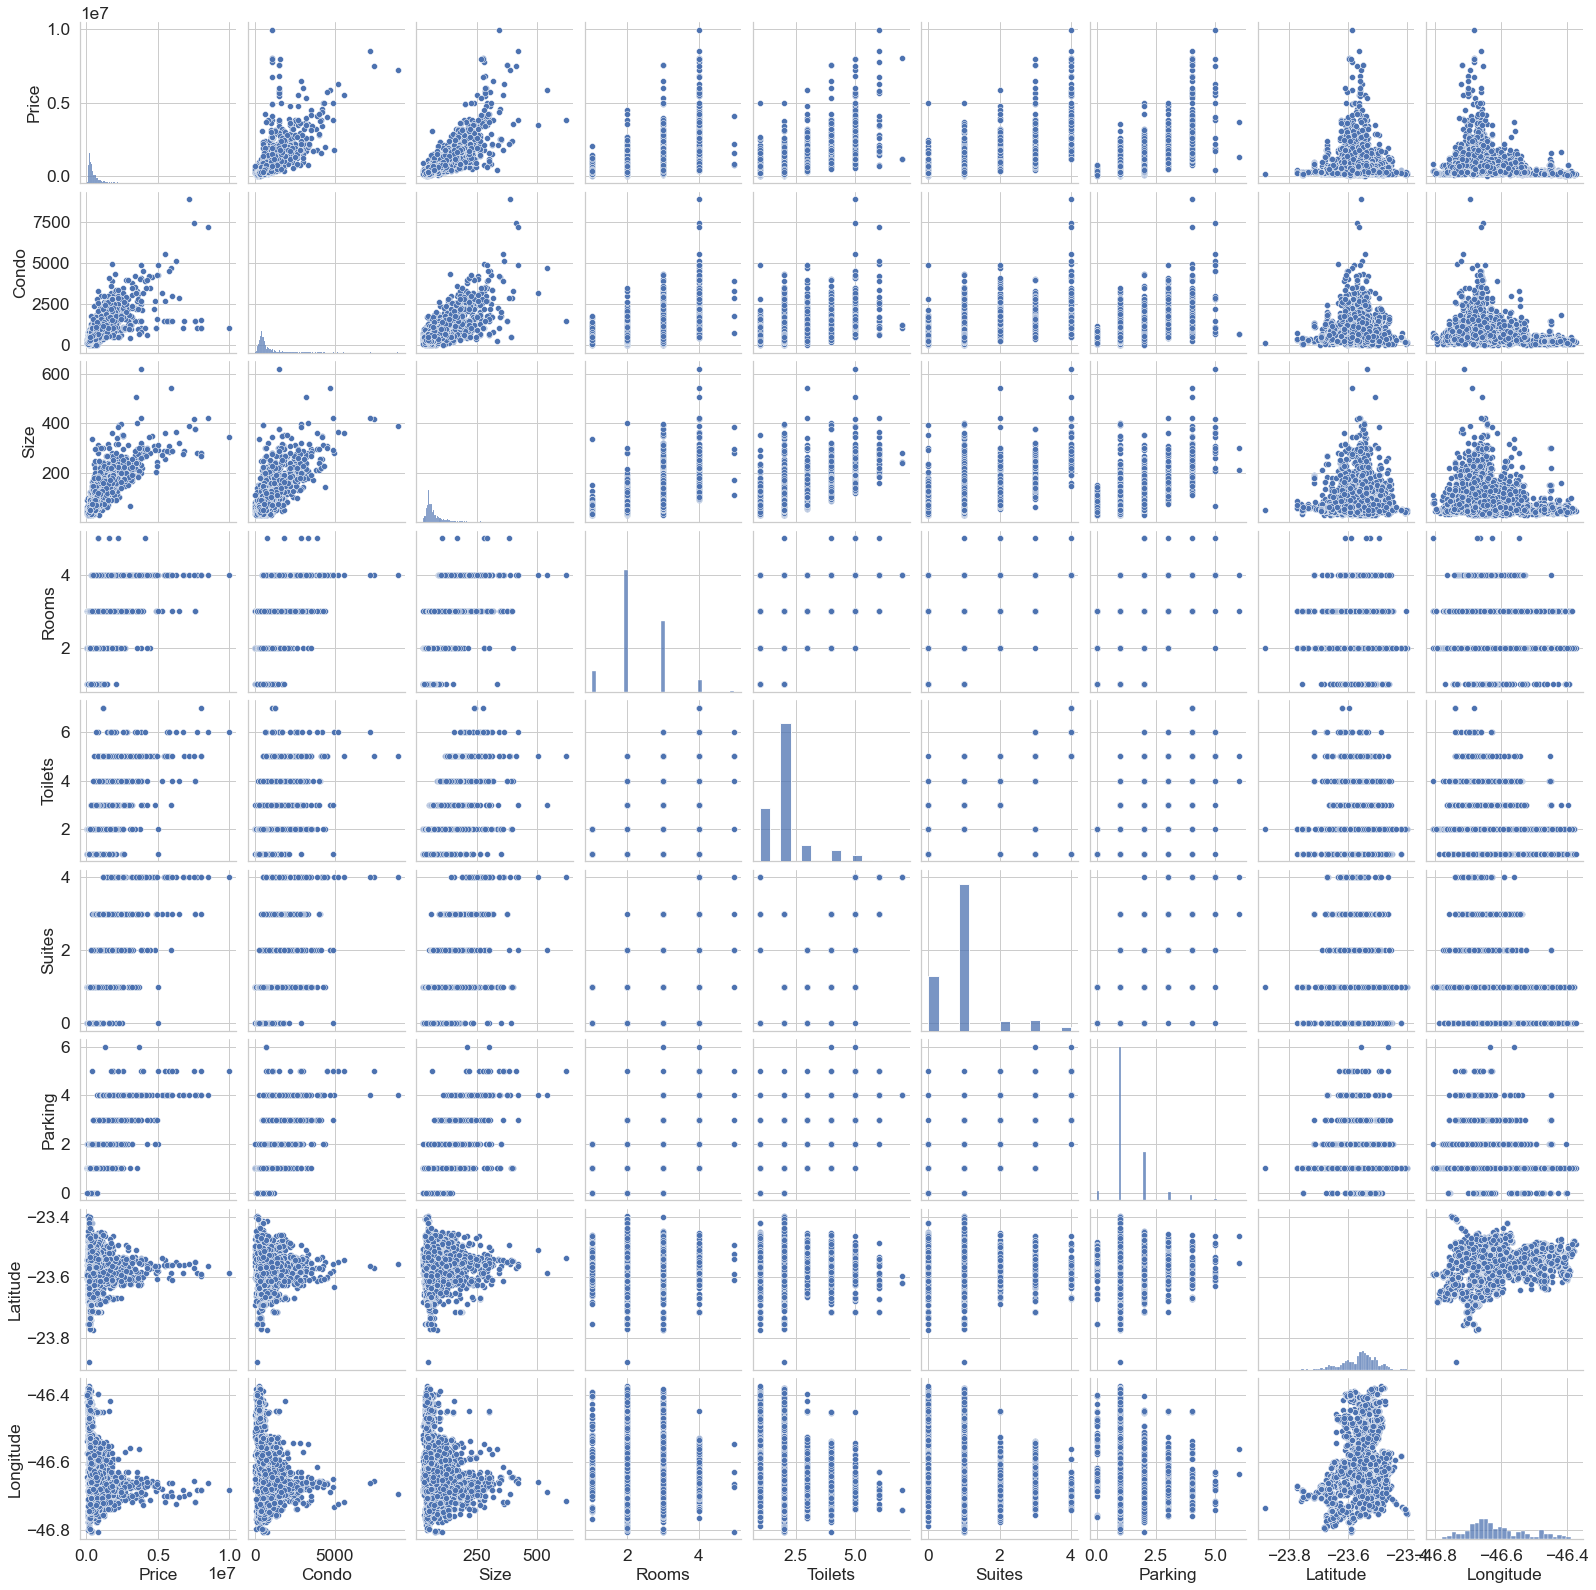

In [68]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=df_train_clean[mask_sale].select_dtypes(include='number'))
display()

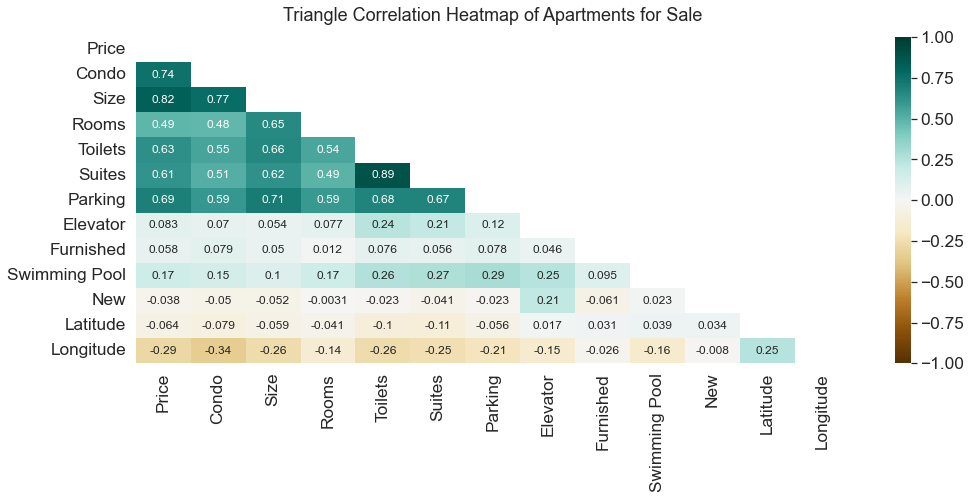

In [69]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_clean[mask_sale].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train_clean[mask_sale].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Sale', fontdict={'fontsize':18}, pad=16);

In [70]:
df_train_clean[mask_sale].corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.824281
Condo            0.744623
Parking          0.688795
Toilets          0.626799
Suites           0.610914
Rooms            0.486552
Swimming Pool    0.168757
Elevator         0.082714
Furnished        0.058318
New             -0.038169
Latitude        -0.064284
Longitude       -0.287771
Name: Price, dtype: float64

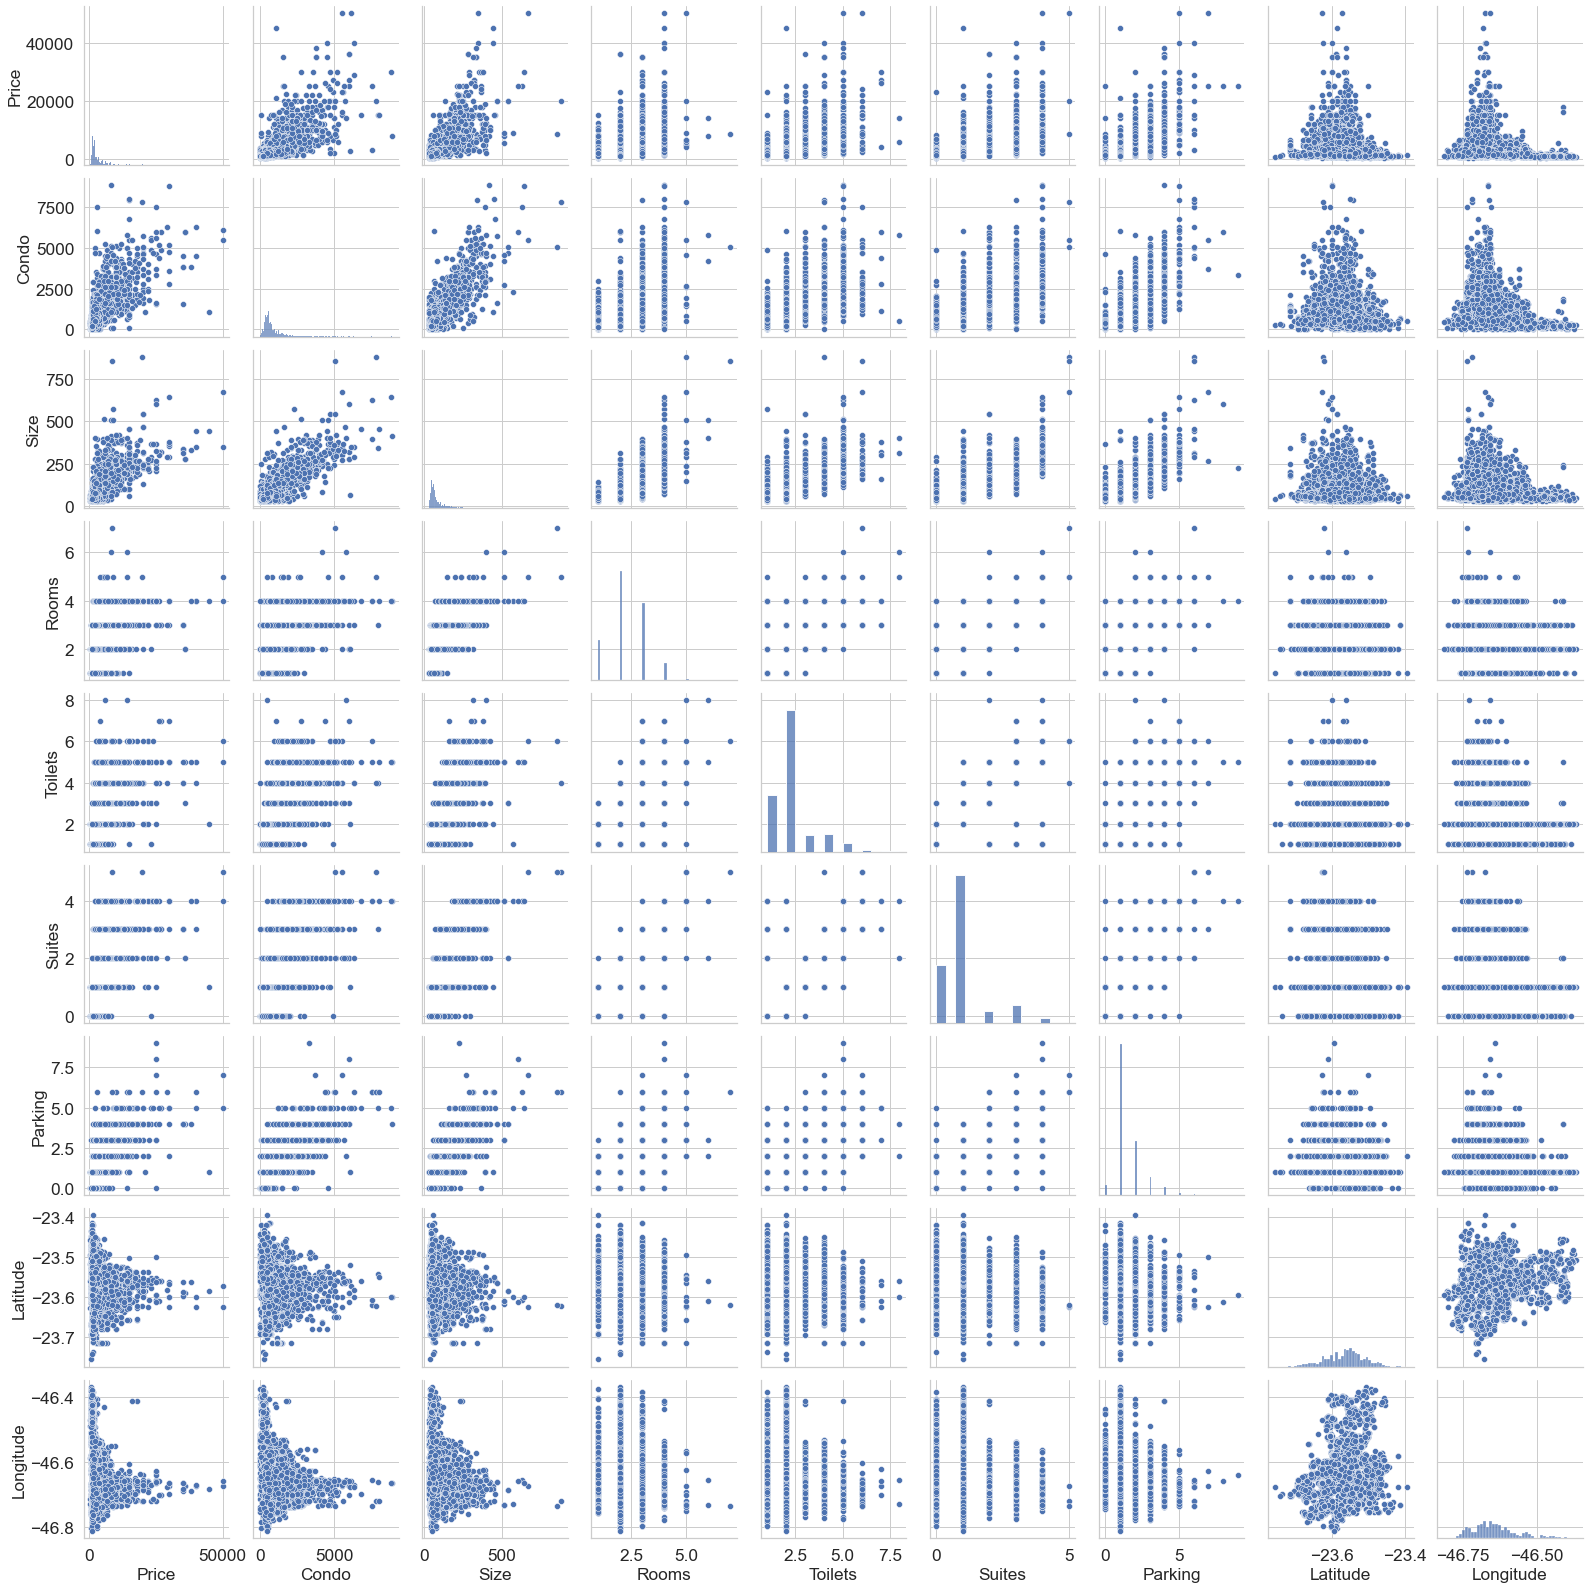

In [71]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=df_train_clean[mask_rent].select_dtypes(include='number'))
display()

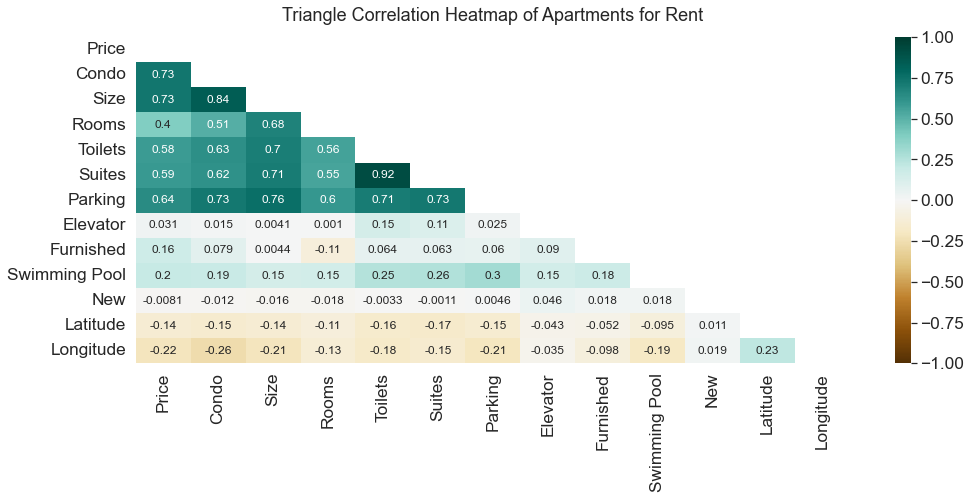

In [72]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_clean[mask_rent].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train_clean[mask_rent].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Rent', fontdict={'fontsize':18}, pad=16);

In [73]:
df_train_clean[mask_rent].corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731041
Condo            0.730616
Parking          0.644991
Suites           0.586416
Toilets          0.582120
Rooms            0.396952
Swimming Pool    0.202191
Furnished        0.164984
Elevator         0.030796
New             -0.008140
Latitude        -0.138739
Longitude       -0.215496
Name: Price, dtype: float64

The _most promising attribute_ to predict the `Price` is the **`Size`**, in both apartments for sale and rent, so let’s zoom in on their correlation scatterplot:

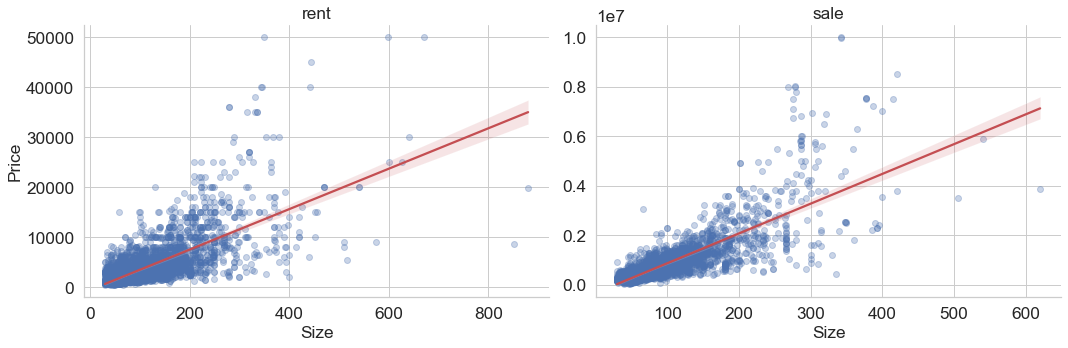

In [74]:
grid = sns.FacetGrid(df, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
plot = grid.map_dataframe(sns.regplot, x='Size', y="Price", scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plot.set_titles("{col_name}")
display()

Here we can see that the _correlation_ is **strong**: see the regression line and the _upward trend_.

### 4.3. Data distribution

In [75]:
numeric_attributes = df_train_clean.select_dtypes(include='number').columns
numeric_attributes

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Latitude', 'Longitude'],
      dtype='object')

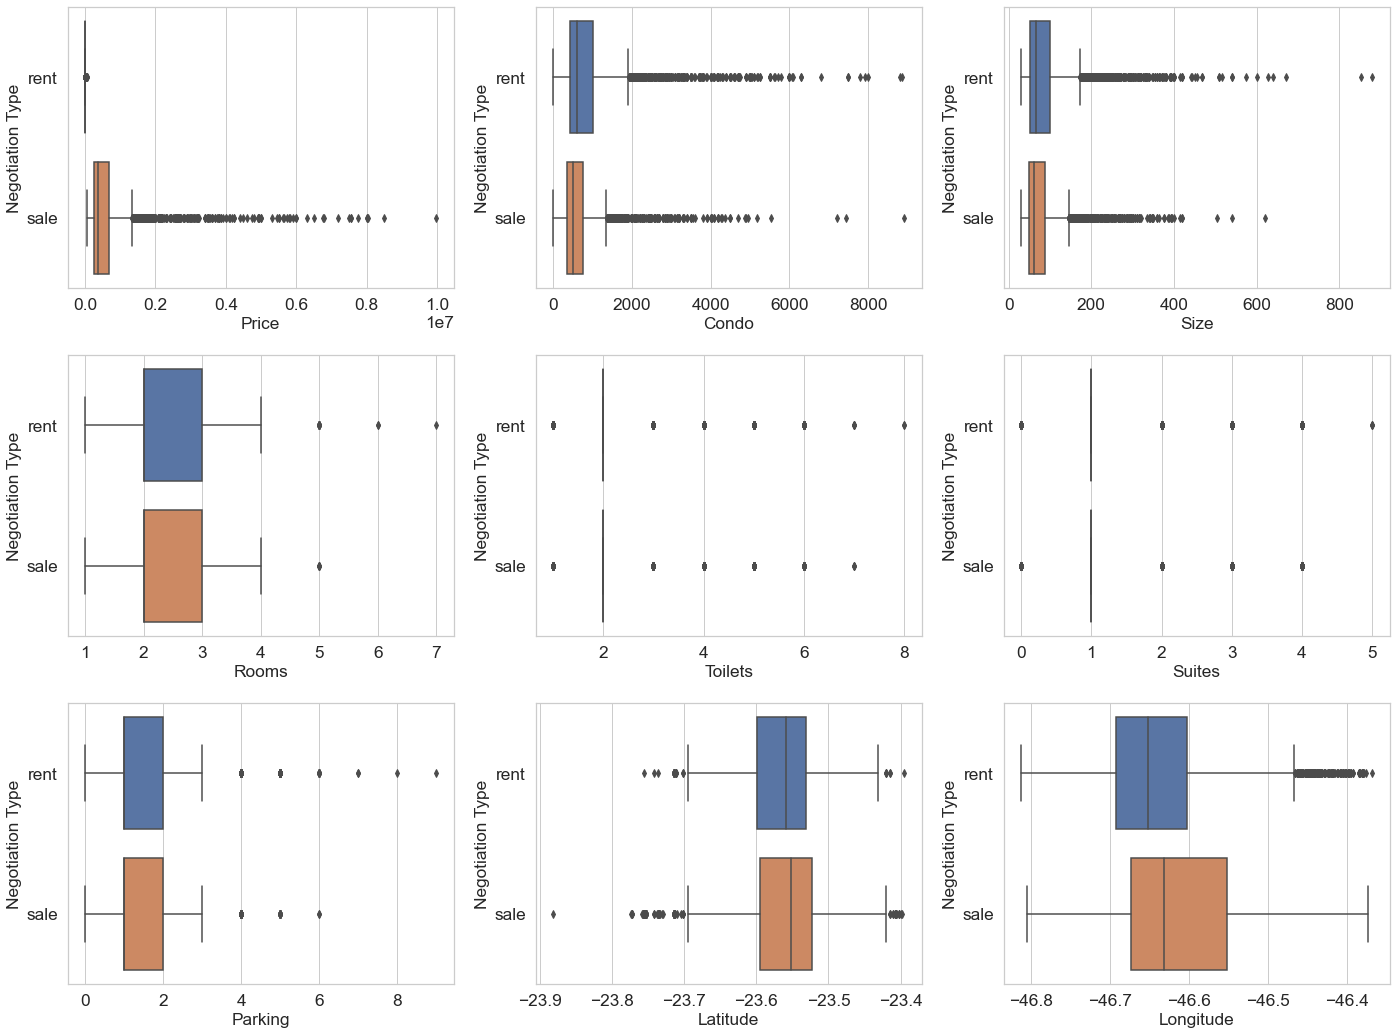

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_train_clean, x=attr, y="Negotiation Type", ax=axes[row, col])

We can see that all the attributes have many _outliers_. However, we **will not** remove them because _they do not seem to be noise_.

As we've seen before, the dataset is not well-balanced, so the majority of the samples have _"low"_ `Prices`, `Condo`, `Size`, `Rooms`, `Toilets`, `Suites`, and `Parking` attributes.

## 🛠️ 5. Prepare the Data (Preprocessing)

In [77]:
df_train_clean.head()

Price   Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4229     6000  2200.0   165      3        2       1        2      True   
649      1500   915.0    86      3        2       1        1      True   
6260   400000   560.0    50      2        2       1        1      True   
4966   785000   550.0    67      2        2       1        1     False   
10344    1700   890.0    47      1        1       0        1     False   

       Furnished  Swimming Pool    New           District Negotiation Type  \
4229       False           True  False  Alto de Pinheiros             rent   
649         True           True  False       Vila Matilde             rent   
6260       False           True  False         Guaianazes             sale   
4966       False           True  False           Brooklin             sale   
10344      False          False  False      Santa Cecília             rent   

        Latitude  Longitude  
4229  -23.541829 -46.718899  
649   -23.525410 -46.525949  
6260  -23.493276 -46.617289  
4966  -23.618385 -46.684776  
10344 -23.537651 -46.656300

**Separating the independent variables (features) and the dependent variable (target outcome)**

Since we do not necessarily want to apply the same transformations to hte features and the target outcome, let's separate them.

In [78]:
df_train_pre = df_train_clean.drop(columns=['Price'])
df_train_target = df_train_clean['Price'].copy()

### 5.1. Categorical Variable Encoding

We have two _categorical variables_ (`Negotiation Type` and `District`) to encode. For that, let's use the [**One Hot Encoding** strategy](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02): a new binary variable/column (**dummy variable**) is added for each _category_ from the variables.

In [79]:
df_train_pre['Negotiation Type'].value_counts()

rent    5641
sale    5015
Name: Negotiation Type, dtype: int64

In [80]:
df_train_pre['District'].value_counts()

Mooca              237
Moema              231
Bela Vista         205
Pinheiros          194
Casa Verde         191
                  ... 
Jardim São Luis     35
Lajeado             35
São Domingos        29
Grajaú              26
Perus               18
Name: District, Length: 96, dtype: int64

In [81]:
# one hot encoding by pandas
df_train_pre = pd.get_dummies(data=df_train_pre, columns=['Negotiation Type', 'District'], drop_first=True)
df_train_pre.head()

Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
4229   2200.0   165      3        2       1        2      True      False   
649     915.0    86      3        2       1        1      True       True   
6260    560.0    50      2        2       1        1      True      False   
4966    550.0    67      2        2       1        1     False      False   
10344   890.0    47      1        1       0        1     False      False   

       Swimming Pool    New  ...  District_Vila Jacuí  \
4229            True  False  ...                    0   
649             True  False  ...                    0   
6260            True  False  ...                    0   
4966            True  False  ...                    0   
10344          False  False  ...                    0   

       District_Vila Leopoldina  District_Vila Madalena  District_Vila Maria  \
4229                          0                       0                    0   
649                           0                       0                    0   
6260                          0                       0                    0   
4966                          0                       0                    0   
10344                         0                       0                    0   

       District_Vila Mariana  District_Vila Matilde  District_Vila Olimpia  \
4229                       0                      0                      0   
649                        0                      1                      0   
6260                       0                      0                      0   
4966                       0                      0                      0   
10344                      0                      0                      0   

       District_Vila Prudente  District_Vila Sônia  District_Água Rasa  
4229                        0                    0                   0  
649                         0                    0                   0  
6260                        0                    0                   0  
4966                        0                    0                   0  
10344                       0                    0                   0  

[5 rows x 108 columns]

**Saving the pre-processed training set**

In [82]:
df_train_pre_saving = df_train_pre.copy()
df_train_pre_saving['Price'] = df_train_target
df_train_pre_saving.to_csv('./datasets/sao-paulo-properties_train_pre_sprint-1.csv', index=False)

In [83]:
df_train_pre_saving.head()

Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
4229   2200.0   165      3        2       1        2      True      False   
649     915.0    86      3        2       1        1      True       True   
6260    560.0    50      2        2       1        1      True      False   
4966    550.0    67      2        2       1        1     False      False   
10344   890.0    47      1        1       0        1     False      False   

       Swimming Pool    New  ...  District_Vila Leopoldina  \
4229            True  False  ...                         0   
649             True  False  ...                         0   
6260            True  False  ...                         0   
4966            True  False  ...                         0   
10344          False  False  ...                         0   

       District_Vila Madalena  District_Vila Maria  District_Vila Mariana  \
4229                        0                    0                      0   
649                         0                    0                      0   
6260                        0                    0                      0   
4966                        0                    0                      0   
10344                       0                    0                      0   

       District_Vila Matilde  District_Vila Olimpia  District_Vila Prudente  \
4229                       0                      0                       0   
649                        1                      0                       0   
6260                       0                      0                       0   
4966                       0                      0                       0   
10344                      0                      0                       0   

       District_Vila Sônia  District_Água Rasa   Price  
4229                     0                   0    6000  
649                      0                   0    1500  
6260                     0                   0  400000  
4966                     0                   0  785000  
10344                    0                   0    1700  

[5 rows x 109 columns]

## 🏋️‍ 6. Train ML Algorithms

In this step, we should train _many_ quick-and-dirty models — with _default values_ for their hyperparameters — from different categories. <br/>
We then _measure the performance_ on the **training set** and shortlist the _top three to five_ **most promising models**.

However, we will only select _one model_ in this sprint — **Linear Regression** — for teaching purposes. We will try new ones in later sprints.

### 6.1. Getting the independent (features) and dependent variables (outcome)
Before training our models, we want to convert the DataFrame and Series for numpy arrays. <br/>
This is not necessarily on this case since the sklearn models can deal with pandas structures.

However, since we will use sklearn transformers in the future, whose outputs will be numpy arrays, let's consider numpy right now.

Just to keep the standard notation of the ML community, let's use **X** for numpy *feature matrix* and **y** for a numpy array of *labels/outcomes*.

In [84]:
X_train = df_train_pre.values
y_train = df_train_target.values

### 6.2. Training the Models

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

### 6.3. Evaluating on the Training Set

#### **Prediction**

In [86]:
y_train_pred = lin_reg.predict(X_train)

#### **Metrics**

##### **Coefficient of Determination - R²**
The proportion of _variation_ in the dependent variable (outcome) that is explained by the predictor variables (regression, in this case). <br/>
R² can be interpreted as the percent of variance in our dependent variable that can be explained by our model. <br/>
R² checks how much the regression line fits the data

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$

#### **Evaluation**

Since our dataset has two `Negotiation Type`s, let's evaluate the model's ability to predict the correct prices of each type.

In [101]:
mask_train_sale = df_train_pre['Negotiation Type_sale'].eq(1)
mask_train_rent = df_train_pre['Negotiation Type_sale'].eq(0)

X_train_sale = X_train[mask_train_sale]
X_train_rent = X_train[mask_train_rent]

y_train_sale = y_train[mask_train_sale]
y_train_rent = y_train[mask_train_rent]

y_train_pred_sale = y_train_pred[mask_train_sale]
y_train_pred_rent = y_train_pred[mask_train_rent]

In [102]:
r2_score = lin_reg.score(X_train, y_train)
print(f'General R2 = {r2_score}')

r2_score_sale = lin_reg.score(X_train_sale, y_train_sale)
print(f'R2 Sale = {r2_score_sale}')

r2_score_rent = lin_reg.score(X_train_rent, y_train_rent)
print(f'R2 Rent = {r2_score_rent}')

General R2 = 0.522152548524925
R2 Sale = 0.5184489177681145
R2 Rent = -6240.2662813078605


In [104]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'General RMSE = {rmse}')

rmse_sale = mean_squared_error(y_train_sale, y_train_pred_sale, squared=False)
print(f'RMSE Sale = {rmse_sale}')

rmse_rent = mean_squared_error(y_train_rent, y_train_pred_rent, squared=False)
print(f'RMSE Rent = {rmse_rent}')

General RMSE = 402856.9934571872
RMSE Sale = 503631.0530877018
RMSE Rent = 284746.79059442895


This initial result is not too bad, but clearly not a great score: most districts’ `Price` approximately range between \\$120,000 (Q1) and $265,000 (Q3), so a typical **prediction error** of \\$69,050 may not be very satisfying. <br/>

This is an example of a **model *underfitting*** the training data. When this happens it can mean that the _features_ **do not** provide enough information to make good predictions, or that the model is not powerful enough.

#### **Visual Analysis**

##### **Prediction vs Real**

Text(0.5, 1.0, 'General Apartment Prices - Prediction vs Real')

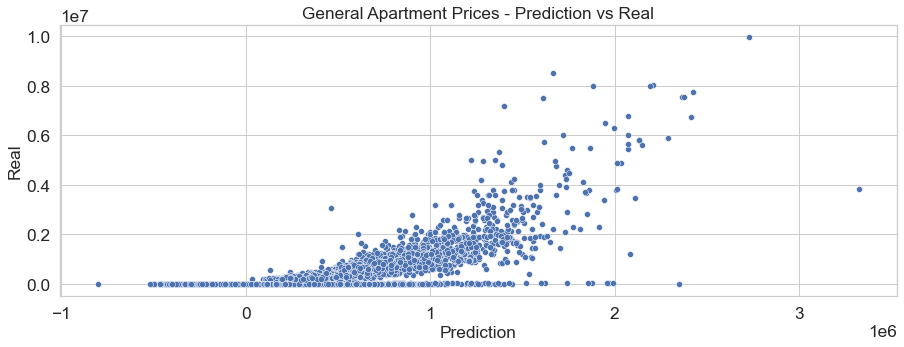

In [105]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('General Apartment Prices - Prediction vs Real')

Text(0.5, 1.0, 'Apartment Sale Prices - Prediction vs Real')

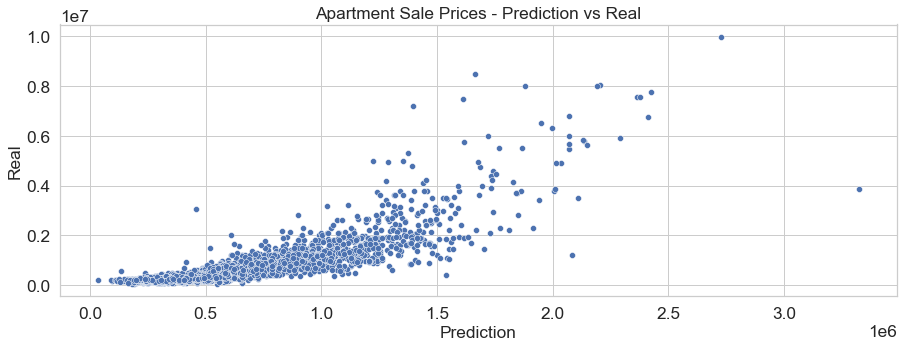

In [106]:
sns.scatterplot(x=y_train_pred_sale, y=y_train_sale)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Sale Prices - Prediction vs Real')

Text(0.5, 1.0, 'Apartment Rent Prices - Prediction vs Real')

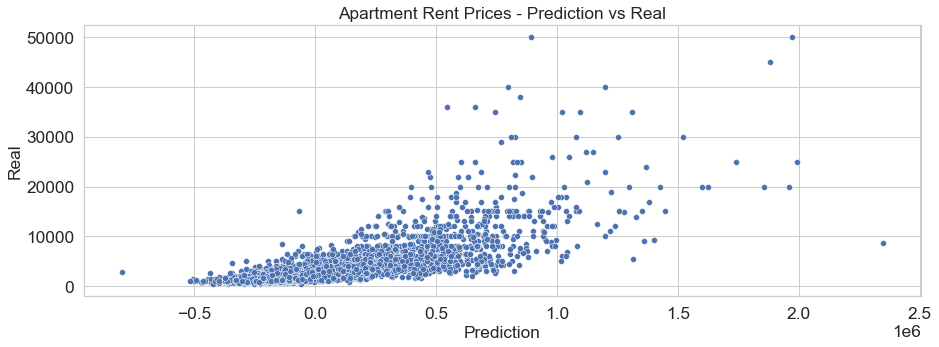

In [107]:
sns.scatterplot(x=y_train_pred_rent, y=y_train_rent)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Rent Prices - Prediction vs Real')

##### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity**.

<img src='./imgs/residual-analysis.png' width=600/>

In [108]:
residual = y_train - y_train_pred
residual_sale = y_train_sale - y_train_pred_sale
residual_rent = y_train_rent - y_train_pred_rent

Text(0.5, 1.0, 'General Apartment Price - Prediction vs Residual')

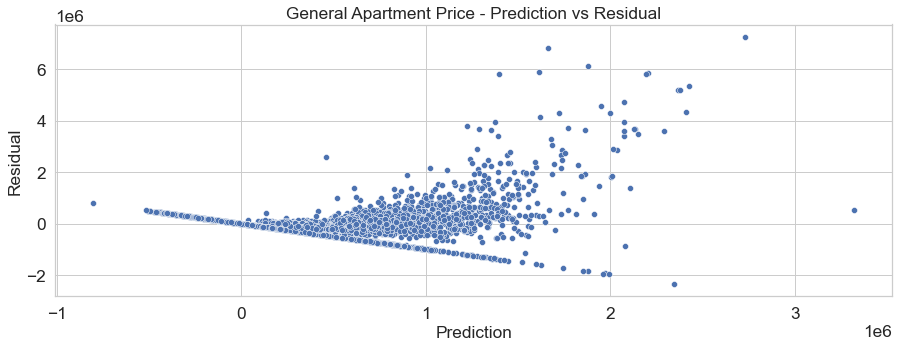

In [109]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('General Apartment Price - Prediction vs Residual')

Text(0.5, 1.0, 'Apartment Sales Price - Prediction vs Residual')

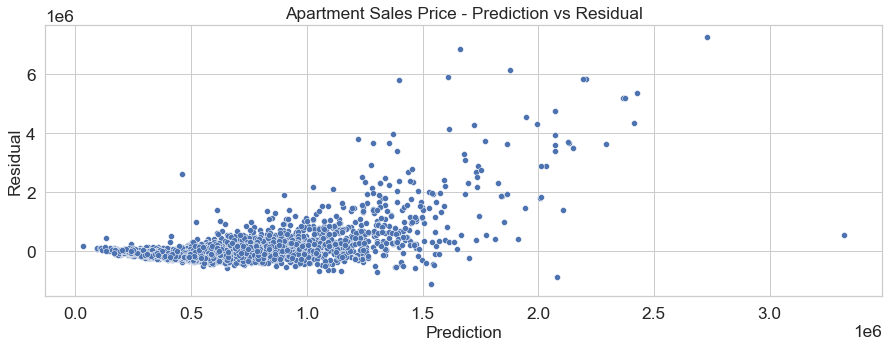

In [110]:
sns.scatterplot(x=y_train_pred_sale, y=residual_sale)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Sales Price - Prediction vs Residual')

Text(0.5, 1.0, 'Apartment Rent Price - Prediction vs Residual')

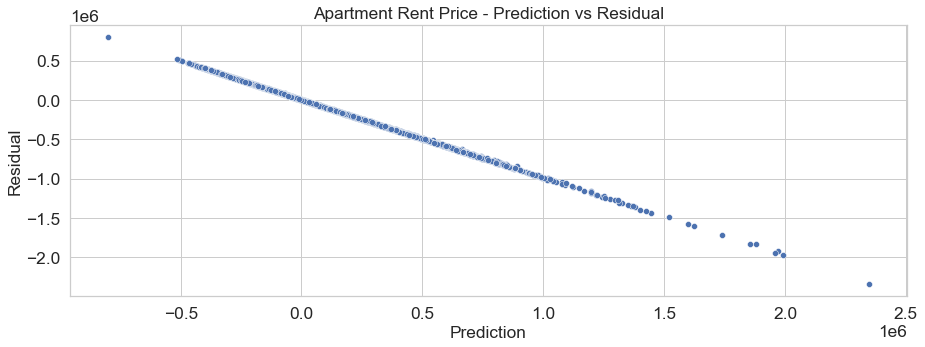

In [111]:
sns.scatterplot(x=y_train_pred_rent, y=residual_rent)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Rent Price - Prediction vs Residual')

<AxesSubplot:ylabel='Count'>

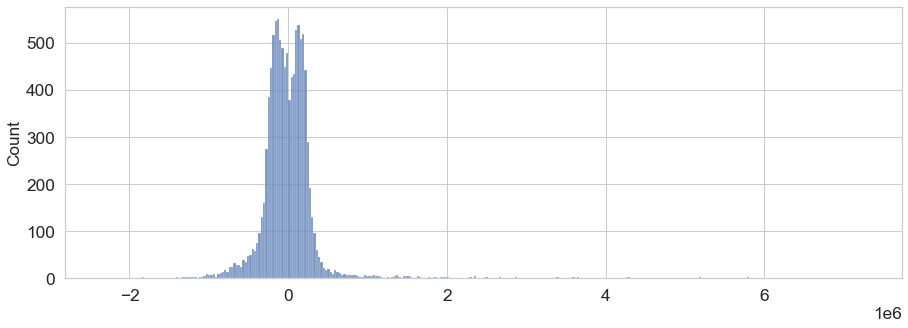

In [119]:
sns.histplot(residual)

<AxesSubplot:ylabel='Count'>

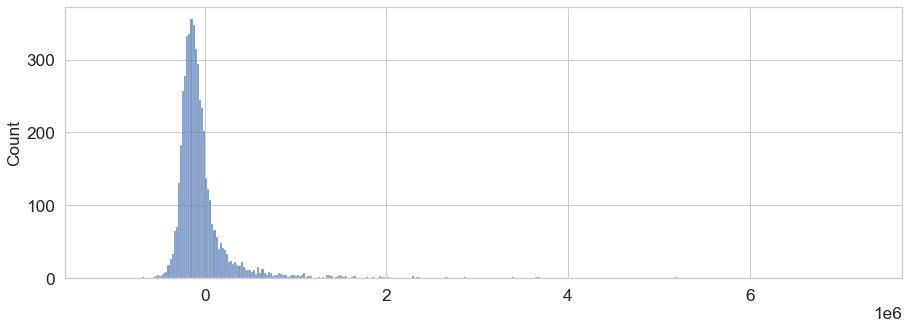

In [112]:
sns.histplot(residual_sale)

<AxesSubplot:ylabel='Count'>

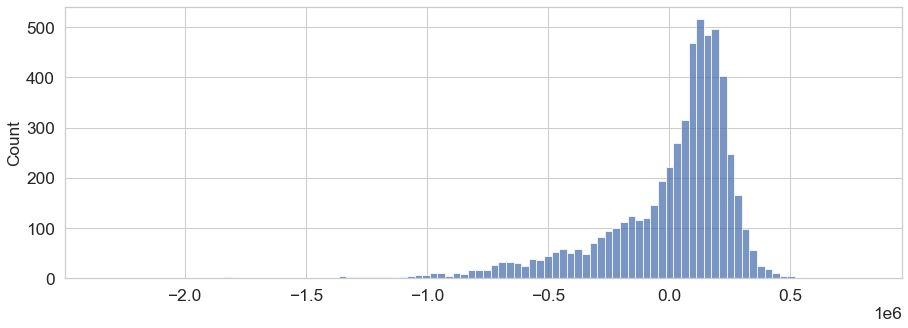

In [113]:
sns.histplot(residual_rent)